<a href="https://colab.research.google.com/github/Gernnn/Data-Bootcamp_12/blob/main/Terrorist_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
import pandas as pd

file_name = "globalterrorismdb_0718dist.tar.bz2"

df = pd.read_csv(file_name, compression='bz2', encoding='ISO-8859-1', low_memory=False)

In [132]:
df.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 136 columns):
 #    Column              Dtype  
---   ------              -----  
 0    Unnamed: 0          int64  
 1    eventid             int64  
 2    iyear               int64  
 3    imonth              int64  
 4    iday                int64  
 5    approxdate          object 
 6    extended            int64  
 7    resolution          object 
 8    country             int64  
 9    country_txt         object 
 10   region              int64  
 11   region_txt          object 
 12   provstate           object 
 13   city                object 
 14   latitude            float64
 15   longitude           float64
 16   specificity         float64
 17   vicinity            int64  
 18   location            object 
 19   summary             object 
 20   crit1               int64  
 21   crit2               int64  
 22   crit3               int64  
 23   doubtterr           float64
 24 

1. How has the number of terrorist activities changed over the years? Are there certain regions where this trend is different from the global averages?

In [133]:
df1 = df[['eventid','iyear','region_txt','attacktype1','attacktype1_txt']]


In [134]:
# time to visualization
import matplotlib.pyplot as plt
import numpy as np


In [192]:
df1['iyear'] = pd.to_datetime(df1['iyear'], format = '%Y')
df1['year_int'] = df1.iyear.dt.year

/tmp/ipython-input-265340177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['iyear'] = pd.to_datetime(df1['iyear'], format = '%Y')
/tmp/ipython-input-265340177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['year_int'] = df1.iyear.dt.year


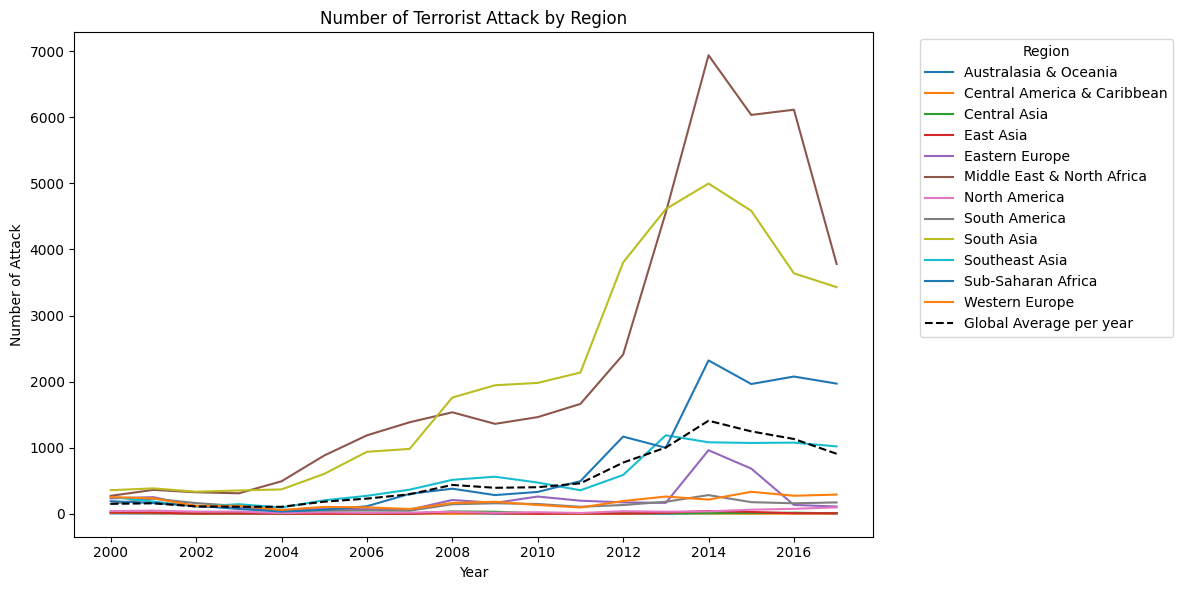

In [200]:
count_attack = df1[df1.year_int >= 2000].groupby(['year_int','region_txt'])['attacktype1_txt'].agg(n_attack = 'count')
glob_avg = count_attack.groupby('year_int')['n_attack'].mean()

region_attk = df1[df1.year_int >= 2000]\
                .groupby(['year_int', 'region_txt'])\
                .size()\
                .unstack()\
                .fillna(0)

fig, ax = plt.subplots(figsize = (12,6))

region_attk.plot.line(ax = ax)

ax.plot(glob_avg.index, glob_avg.values, color = 'black' ,linestyle = '--', label = 'Global Average per year')
ax.set_title('Number of Terrorist Attack by Region')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Attack')
plt.xticks(np.arange(2000,2018,2))
plt.legend(title = 'Region', bbox_to_anchor=(1.05, 1), loc= 'upper left')
plt.tight_layout()

In [194]:
count_attack = df1[df1.year_int >= 2000].groupby(['year_int', 'region_txt'])['attacktype1_txt'].agg(n_attack = 'count').reset_index()
count_attack.groupby('year_int')['n_attack'].mean()

,n_attack
year_int,
2000,151.166667
2001,158.833333
2002,111.083333
2003,106.500000
2004,106.000000
2005,183.363636
2006,229.833333
2007,294.727273
2008,436.818182
